In [1]:
import pandas as pd
import sklearn as sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

In [2]:
bank = pd.read_csv("UniversalBank.csv")

In [3]:
bankloan = bank

In [4]:
bankloan.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
bankloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
bankloan.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [7]:
if 'Education' in bankloan.columns:
    bankloan['Education'] = bankloan['Education'].astype('category')

In [8]:
bankloan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   ID                  5000 non-null   int64   
 1   Age                 5000 non-null   int64   
 2   Experience          5000 non-null   int64   
 3   Income              5000 non-null   int64   
 4   ZIP Code            5000 non-null   int64   
 5   Family              5000 non-null   int64   
 6   CCAvg               5000 non-null   float64 
 7   Education           5000 non-null   category
 8   Mortgage            5000 non-null   int64   
 9   Personal Loan       5000 non-null   int64   
 10  Securities Account  5000 non-null   int64   
 11  CD Account          5000 non-null   int64   
 12  Online              5000 non-null   int64   
 13  CreditCard          5000 non-null   int64   
dtypes: category(1), float64(1), int64(12)
memory usage: 513.0 KB


In [9]:
education_dummies = pd.get_dummies(bankloan['Education'], prefix='Education', drop_first=True)

In [10]:
bankloan = pd.concat([bankloan, education_dummies], axis=1)

In [11]:
bankloan.drop('Education', axis=1, inplace=True)
print(bankloan.head())

   ID  Age  Experience  Income  ZIP Code  Family  CCAvg  Mortgage  \
0   1   25           1      49     91107       4    1.6         0   
1   2   45          19      34     90089       3    1.5         0   
2   3   39          15      11     94720       1    1.0         0   
3   4   35           9     100     94112       1    2.7         0   
4   5   35           8      45     91330       4    1.0         0   

   Personal Loan  Securities Account  CD Account  Online  CreditCard  \
0              0                   1           0       0           0   
1              0                   1           0       0           0   
2              0                   0           0       0           0   
3              0                   0           0       0           0   
4              0                   0           0       0           1   

   Education_2  Education_3  
0        False        False  
1        False        False  
2        False        False  
3         True        False  
4 

In [12]:
bankloan.drop(columns=['ID','ZIP Code'], inplace=True)

In [13]:
bankloan.head()

,Age,Experience,Income,Family,CCAvg,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,Education_2,Education_3
0,25,1,49,4,1.6,0,0,1,0,0,0,False,False
1,45,19,34,3,1.5,0,0,1,0,0,0,False,False
2,39,15,11,1,1.0,0,0,0,0,0,0,False,False
3,35,9,100,1,2.7,0,0,0,0,0,0,True,False
4,35,8,45,4,1.0,0,0,0,0,0,1,True,False


In [14]:
X = bankloan.drop(columns=['Personal Loan'])
y = bankloan['Personal Loan']

In [15]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.3, random_state=42)

In [17]:
new_customer = pd.DataFrame([{
    'Age': 40,
    'Experience': 15,
    'Income': 85,
    'Family': 4,
    'CCAvg': 4,
    'Mortgage': 100,
    'Securities Account': 1,
    'CD Account': 0,
    'Online': 0,
    'CreditCard': 1,
    'Education_2': 1,
    'Education_3': 0
}])

In [18]:
new_customer = scaler.transform(new_customer)

In [23]:
best_k = 1
best_accuracy = 0
accuracies = []

In [33]:
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"k={k}, accuracy={accuracy}")
    if accuracy > best_accuracy:
        best_k = k
        best_accuracy = accuracy

k=1, accuracy=0.9593333333333334
k=2, accuracy=0.9486666666666667
k=3, accuracy=0.958
k=4, accuracy=0.946
k=5, accuracy=0.9526666666666667
k=6, accuracy=0.942
k=7, accuracy=0.9493333333333334
k=8, accuracy=0.9406666666666667
k=9, accuracy=0.948
k=10, accuracy=0.9406666666666667
k=11, accuracy=0.9426666666666667
k=12, accuracy=0.9386666666666666
k=13, accuracy=0.942
k=14, accuracy=0.9346666666666666
k=15, accuracy=0.9393333333333334
k=16, accuracy=0.9346666666666666
k=17, accuracy=0.9413333333333334
k=18, accuracy=0.936
k=19, accuracy=0.9393333333333334
k=20, accuracy=0.932


In [32]:
print(f"Best k: {best_k}, Accuracy: {best_accuracy:.2f}")

Best k: 1, Accuracy: 0.96


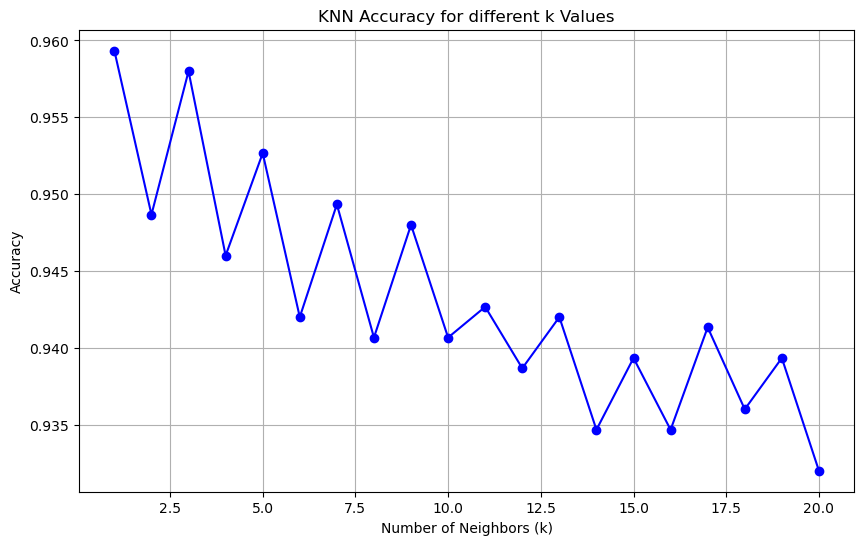

In [28]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), accuracies, marker='o', linestyle='-', color='b')
plt.title("KNN Accuracy for different k Values")
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.grid()
plt.show()

In [22]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)
new_customer_prediction = knn.predict(new_customer)

print(f"Prediction for the new customer: {'Personal Loan Approved' if new_customer_prediction[0] == 1 else 'Personal Loan Not Approved'}")

Prediction for the new customer: Personal Loan Not Approved
